In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

### ALL

In [ ]:
#new model
#new_model='train_all_step_01.log' #this is 500
new_model='train_all_step_1500.log'
infile = r"/scratch/sb3923/deep-cancer/logs/"+new_model
step_size = 1500
#step_size = 500

auc_new = []
keep_phrases = ["macro AUC"]

with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            auc_new.append(line.split(" ")[2][:-2])

print(auc_new)

In [ ]:
#inception
keep_phrase = ["macro"]
auc = {}
va = 'validation_auc' #5000
#va ='validation_auc_500'

for path, subdirs, files in os.walk('/scratch/sb3923/inception_all/DeepPATH/DeepPATH_code/01_training/xClasses/'+va):
    for sd in subdirs: 
        if 'test' in sd:
            files = os.listdir('/scratch/sb3923/inception_all/DeepPATH/DeepPATH_code/01_training/xClasses/'+va+'/'+sd)
            for f in files:
                #print(f)
                if 'out2_roc_data_AvPb_macro' in f:
                    auc[int(sd.split("_")[1][:-1])]=f.split("_")[6]
print(auc)    

In [ ]:
#plot both
a=list(auc.values())
t1=list(auc.keys())
t2 = list(range(step_size,(len(auc_new)+1)*step_size,step_size))
b=auc_new
plt.scatter(t1, a, c= 'b',label='inception') # plotting t, a separately 
plt.scatter(t2, b, c= 'r', label='new model') # plotting t, b separately 
plt.xlabel('number of steps', fontsize=18)
plt.ylabel('macro auc', fontsize=16)
plt.legend(loc='lower right')
plt.title('All cancer types')
plt.show()

### LUSC

In [2]:
#new model
new_model='train_lusc_02.log'

#new_model='train_brca.log'

infile = r"/scratch/sb3923/deep-cancer/logs/"+new_model
step_size = 1000

auc_new = []
steps = []
keep_phrases = ["macro AUC"]

with open(infile) as f:
    f = f.readlines()

#for line in f:
#    for phrase in keep_phrases:
#        if phrase in line:
#            auc_new.append(line.split(" ")[2][:-2])
            
for i in range(1,len(f)):
        if 'Training' in f[i]:
            if int(f[i].split(" ")[0].split(']')[1][1:-5])%1000 ==0:
                auc_new.append(f[i+5].split(" ")[2][:-2])
                steps.append(i)

print(auc_new)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/sb3923/deep-cancer/logs/train_lusc2.log'

In [4]:
#inception
keep_phrase = ["macro"]
auc = {}
#va = 'validation_auc_1000_lusc'
va = 'validation_auc_lusc2'

#validation_auc_1000_lusc
for path, subdirs, files in os.walk('/scratch/sb3923/inception_all/DeepPATH/DeepPATH_code/01_training/xClasses/'+va):
    for sd in subdirs: 
        if 'test' in sd:
            files = os.listdir('/scratch/sb3923/inception_all/DeepPATH/DeepPATH_code/01_training/xClasses/'+va+'/'+sd)
            for f in files:
                if 'out2_roc_data_AvPb_macro' in f:
                    #print(sd)
                    #print(f)
                    auc[int(sd.split("_")[1][:-1])]=f.split("_")[6]
print(auc)    

{128000: '0.6779', 113000: '0.6613', 149000: '0.4047', 18000: '0.6156', 55000: '0.6588', 139000: '0.6830', 42000: '0.5995', 103000: '0.6753', 110000: '0.6745', 127000: '0.6734', 52000: '0.6446', 84000: '0.5353', 78000: '0.6661', 169000: '0.6690', 134000: '0.6806', 156000: '0.6713', 126000: '0.6728', 53000: '0.6584', 20000: '0.6220', 147000: '0.4069', 75000: '0.6418', 104000: '0.6610', 124000: '0.6633', 130000: '0.6697', 61000: '0.4446', 17000: '0.6237', 178000: '0.6825', 82000: '0.5987', 99000: '0.6337', 43000: '0.5692', 167000: '0.6678', 98000: '0.6351', 60000: '0.5311', 170000: '0.6680', 69000: '0.3771', 81000: '0.6576', 166000: '0.6605', 145000: '0.4527', 150000: '0.4373', 59000: '0.5735', 37000: '0.5262', 144000: '0.5367', 88000: '0.5102', 63000: '0.4530', 165000: '0.6484', 34000: '0.5129', 118000: '0.6493', 122000: '0.6419', 159000: '0.6498', 5000: '0.7014', 173000: '0.6771', 79000: '0.6747', 31000: '0.5023', 100000: '0.6415', 102000: '0.6629', 2000: '0.6744', 146000: '0.4209', 12

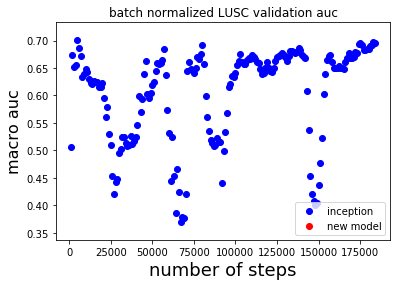

In [6]:
#plot both
a=list(auc.values())
t1=list(auc.keys())
#t2 = list(range(step_size,(len(auc_new)+1)*step_size,step_size))
t2=steps
b=auc_new
plt.scatter(t1, a, c= 'b',label='inception') # plotting t, a separately 
plt.scatter(t2, b, c= 'r', label='new model') # plotting t, b separately 
plt.xlabel('number of steps', fontsize=18)
plt.ylabel('macro auc', fontsize=16)
#plt.xlim([0,75000])
plt.legend(loc='lower right')
plt.title('LUSC validation auc')
plt.show()